In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set() 

In [2]:
car=pd.read_csv('Car_preprocessed.csv')
car.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [3]:
X=car.drop('log_price',axis=1)

y=car['log_price']

X.shape,y.shape

((3867, 17), (3867,))

In [4]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

In [7]:
X_scaled[0]

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=32)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [10]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred_train=reg.predict(X_train)

Text(0, 0.5, 'Predictions (y_pred)')

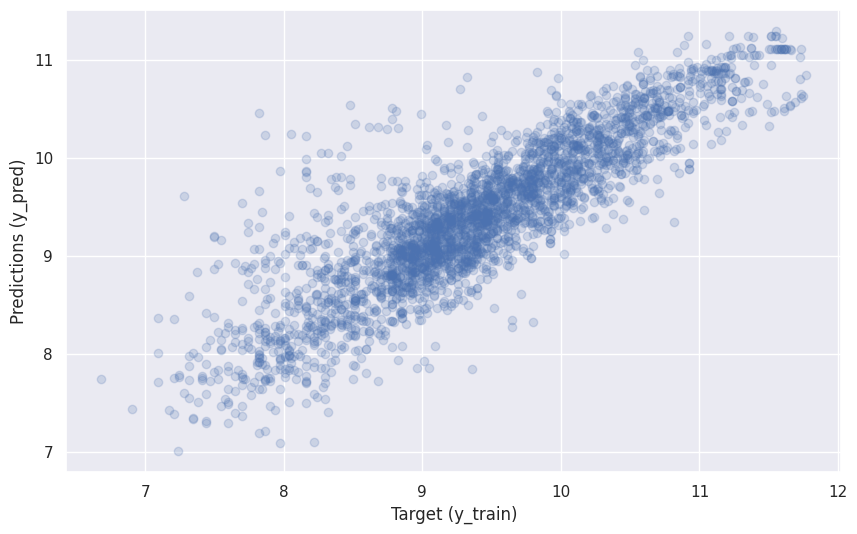

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(y_train,y_pred_train,alpha=0.2)
plt.xlabel('Target (y_train)')
plt.ylabel('Predictions (y_pred)')

Text(0.5, 1.0, 'Training Residual PDF')

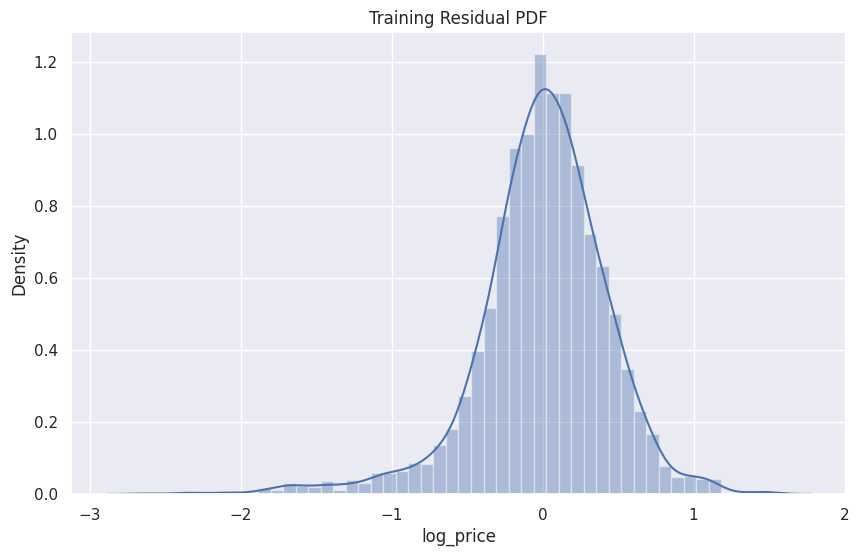

In [13]:
residual_train=(y_train - y_pred_train)
plt.figure(figsize=(10,6))
sns.distplot(residual_train)
plt.title('Training Residual PDF')

In [14]:
from sklearn.metrics import r2_score

r2_score(y_train,y_pred_train)

0.7572893585761237

In [15]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train)))

10165.941028678862

Text(0, 0.5, 'Prediction (y_pred)')

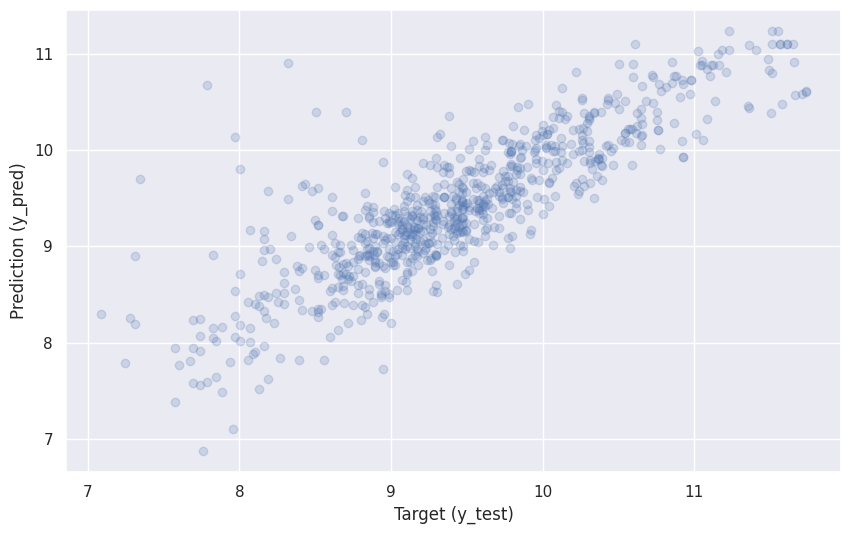

In [19]:
#On testing data

y_pred = reg.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.2)
plt.xlabel('Target (y_test)')
plt.ylabel('Prediction (y_pred)')

In [20]:
np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))

11692.288211748433

In [21]:
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction'])

y_test = y_test.reset_index(drop=True)

df_eval['Target'] = np.exp(y_test)

df_eval

,Prediction,Target
0,18328.250265,19000.0
1,5256.283391,5500.0
2,22185.025441,19200.0
3,10102.190466,11900.0
4,4000.490570,7750.0
...,...,...
769,39166.491984,116500.0
770,6060.759191,13200.0
771,15649.805091,27500.0
772,11164.302749,16500.0


In [16]:
df_eval['Residual'] = df_eval['Target'] - df_eval['Prediction']
df_eval['Difference %'] = np.absolute(df_eval['Residual'] / df_eval['Target'] * 100)
df_eval

,Prediction,Target,Residual,Difference %
0,19272.506272,19000.0,-272.506272,1.434244
1,4417.384292,5500.0,1082.615708,19.683922
2,26623.431893,19200.0,-7423.431893,38.663708
3,11702.055530,11900.0,197.944470,1.663399
4,5891.575170,7750.0,1858.424830,23.979675
...,...,...,...,...
769,43442.878440,116500.0,73057.121560,62.709976
770,7650.856814,13200.0,5549.143186,42.038964
771,22208.456414,27500.0,5291.543586,19.241977
772,20536.856916,16500.0,-4036.856916,24.465799


In [17]:
df_eval.describe()

,Prediction,Target,Residual,Difference %
count,774.000000,774.000000,774.000000,774.000000
mean,16748.632179,18602.017829,1853.385651,23.152186
std,13529.959573,20139.559184,10148.111340,33.270383
min,1246.640597,1200.000000,-27025.031874,0.000846
25%,7802.796454,7500.000000,-1661.049628,8.290693
50%,12595.357117,11900.000000,-21.070689,16.779156
75%,21680.125323,20999.060000,2006.501632,28.617288
max,73203.269579,125000.000000,81323.809317,659.147119
